In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

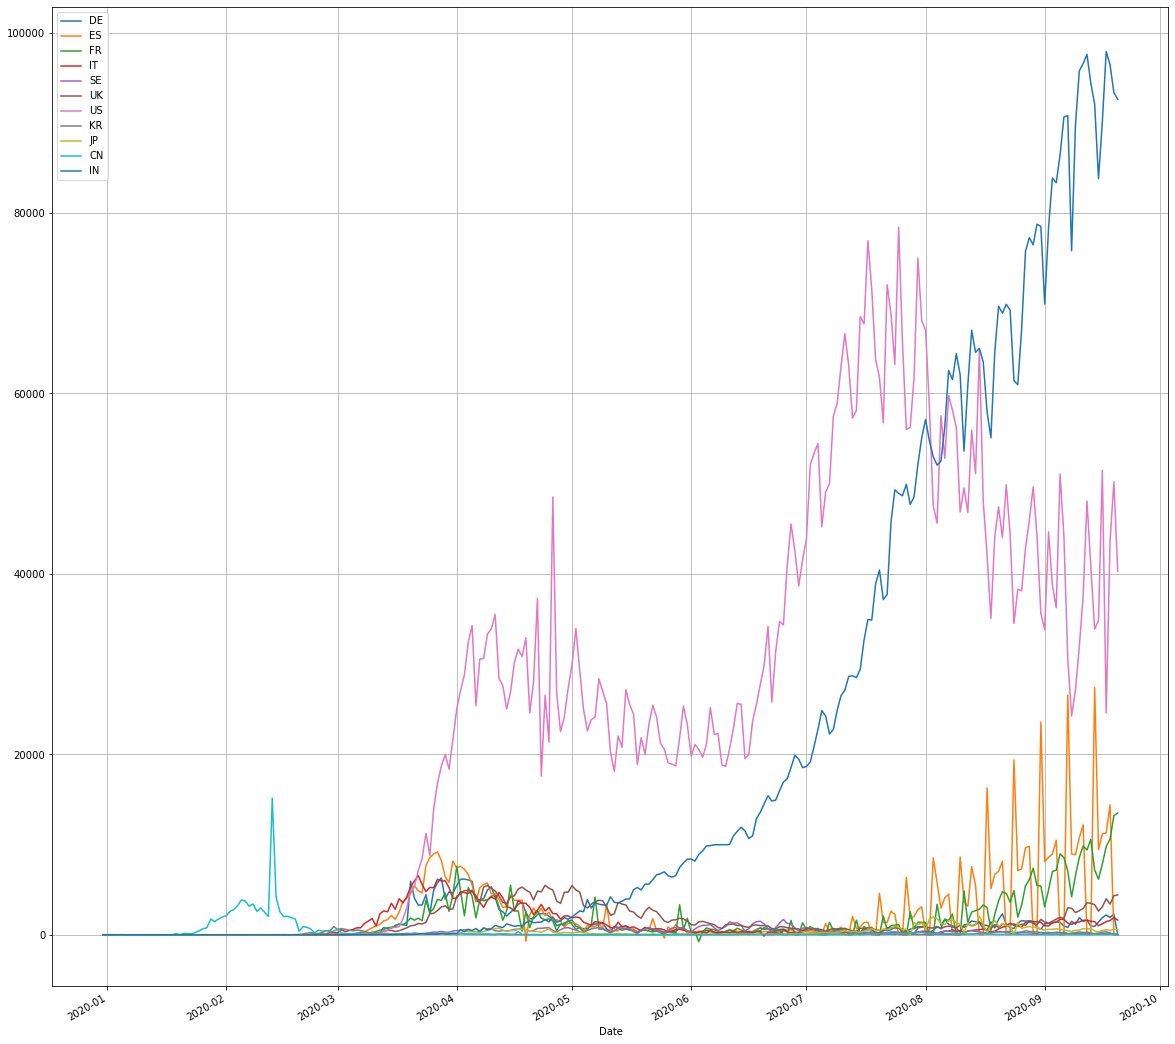

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

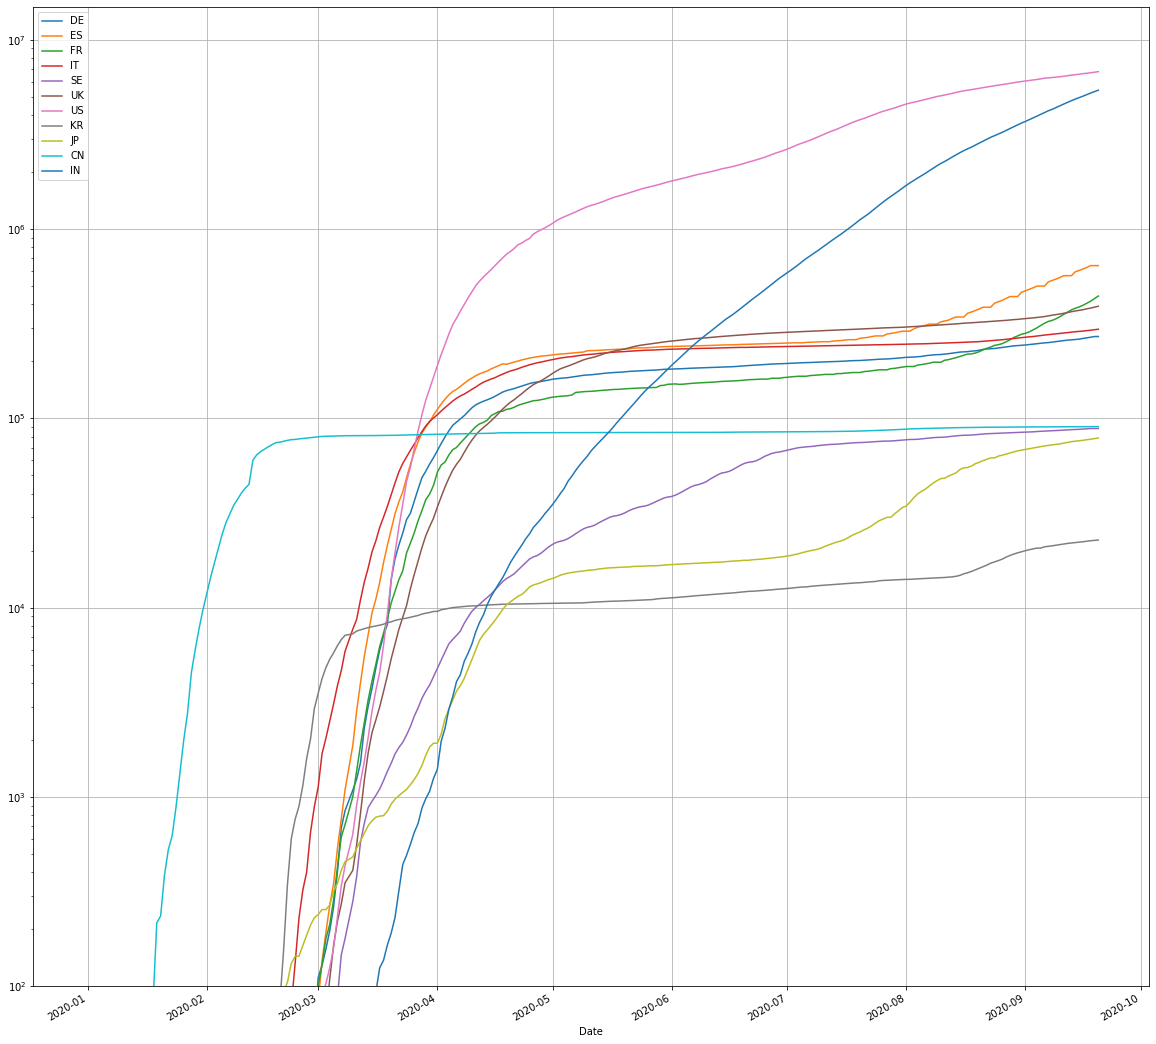

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

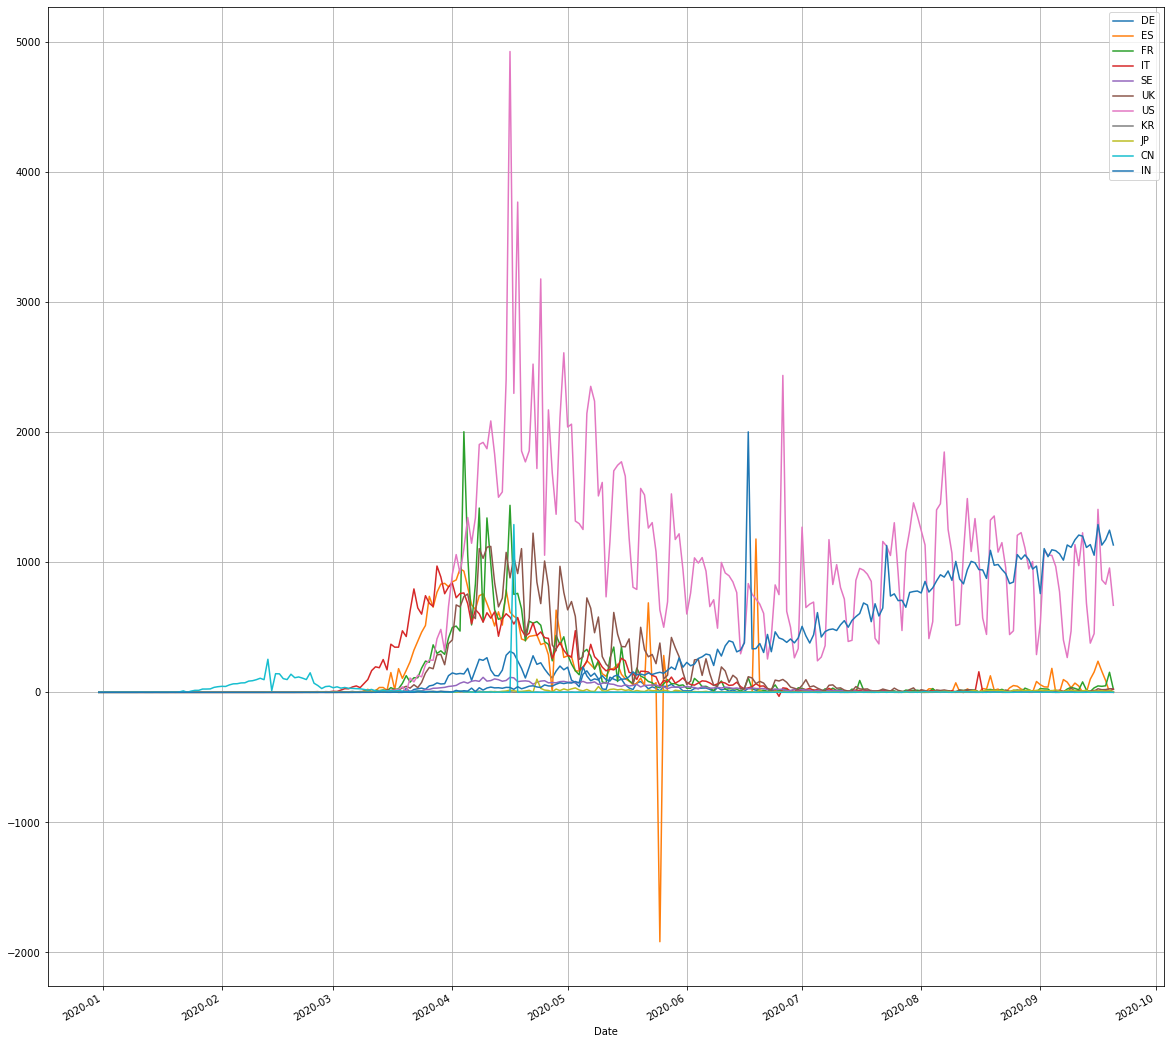

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

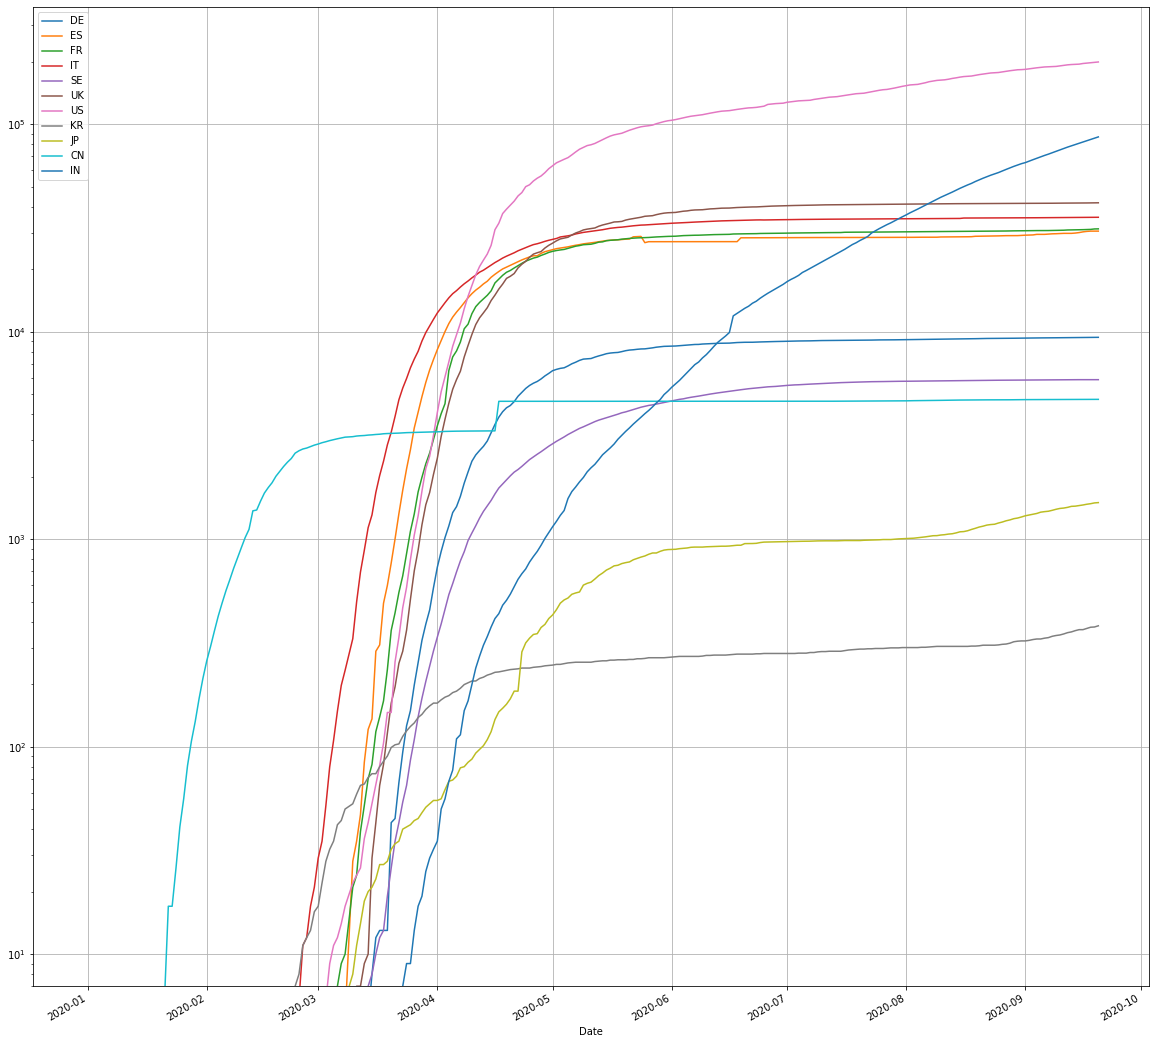

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-09-06,988.0,0.0,8550,1694,171,1813,44140,335,543,17,90632
12,2020-09-07,814.0,26560.0,7071,1296,67,2988,30555,119,437,33,90802
11,2020-09-08,1499.0,8964.0,4203,1150,185,2948,24250,136,378,21,75809
10,2020-09-09,1176.0,8866.0,6544,1369,238,2460,27122,156,492,8,89706
9,2020-09-10,1892.0,10764.0,8577,1430,314,2659,31927,155,495,13,95735
8,2020-09-11,1484.0,12183.0,9843,1597,257,2919,37507,176,680,27,96551
7,2020-09-12,1630.0,0.0,9406,1616,292,3539,48061,136,643,18,97570
6,2020-09-13,948.0,0.0,10561,1501,206,3497,40820,121,674,23,94372
5,2020-09-14,927.0,27404.0,7183,1456,106,3330,33871,109,439,29,92071
4,2020-09-15,1407.0,9437.0,6158,1008,220,2621,34841,106,301,22,83809


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-09-06,249930.0,498556.0,317296.0,274846.0,85455.0,344104.0,6245745.0,20929.0,71386.0,89980.0,4113811.0
2020-09-07,250744.0,525116.0,324367.0,276142.0,85522.0,347092.0,6276300.0,21048.0,71823.0,90013.0,4204613.0
2020-09-08,252243.0,534080.0,328570.0,277292.0,85707.0,350040.0,6300550.0,21184.0,72201.0,90034.0,4280422.0
2020-09-09,253419.0,542946.0,335114.0,278661.0,85945.0,352500.0,6327672.0,21340.0,72693.0,90042.0,4370128.0
2020-09-10,255311.0,553710.0,343691.0,280091.0,86259.0,355159.0,6359599.0,21495.0,73188.0,90055.0,4465863.0
2020-09-11,256795.0,565893.0,353534.0,281688.0,86516.0,358078.0,6397106.0,21671.0,73868.0,90082.0,4562414.0
2020-09-12,258425.0,565893.0,362940.0,283304.0,86808.0,361617.0,6445167.0,21807.0,74511.0,90100.0,4659984.0
2020-09-13,259373.0,565893.0,373501.0,284805.0,87014.0,365114.0,6485987.0,21928.0,75185.0,90123.0,4754356.0
2020-09-14,260300.0,593297.0,380684.0,286261.0,87120.0,368444.0,6519858.0,22037.0,75624.0,90152.0,4846427.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-09-06,1.0,0.0,12,16,0,12,773,3,8,0,1065
12,2020-09-07,0.0,98.0,3,7,3,2,403,2,6,2,1016
11,2020-09-08,4.0,78.0,25,12,1,3,267,5,14,2,1133
10,2020-09-09,9.0,34.0,38,10,1,32,471,3,16,1,1115
9,2020-09-10,3.0,71.0,30,14,0,8,1136,2,13,0,1172
8,2020-09-11,1.0,48.0,19,10,3,14,974,4,6,0,1209
7,2020-09-12,5.0,0.0,80,10,5,6,1227,5,11,0,1201
6,2020-09-13,2.0,0.0,17,6,2,9,685,3,16,1,1114
5,2020-09-14,1.0,101.0,6,7,0,5,378,5,3,0,1136
4,2020-09-15,12.0,156.0,34,14,1,9,451,4,9,1,1054


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-09-06,9325.0,29418.0,30689.0,35401.0,5849.0,41549.0,188534.0,333.0,1356.0,4705.0,70626.0
2020-09-07,9325.0,29516.0,30692.0,35408.0,5852.0,41551.0,188937.0,335.0,1362.0,4707.0,71642.0
2020-09-08,9329.0,29594.0,30717.0,35420.0,5853.0,41554.0,189204.0,340.0,1376.0,4709.0,72775.0
2020-09-09,9338.0,29628.0,30755.0,35430.0,5854.0,41586.0,189675.0,343.0,1392.0,4710.0,73890.0
2020-09-10,9341.0,29699.0,30785.0,35444.0,5854.0,41594.0,190811.0,345.0,1405.0,4710.0,75062.0
2020-09-11,9342.0,29747.0,30804.0,35454.0,5857.0,41608.0,191785.0,349.0,1411.0,4710.0,76271.0
2020-09-12,9347.0,29747.0,30884.0,35464.0,5862.0,41614.0,193012.0,354.0,1422.0,4710.0,77472.0
2020-09-13,9349.0,29747.0,30901.0,35470.0,5864.0,41623.0,193697.0,357.0,1438.0,4711.0,78586.0
2020-09-14,9350.0,29848.0,30907.0,35477.0,5864.0,41628.0,194075.0,362.0,1441.0,4711.0,79722.0
